# EDA Project

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    df_products = pd.read_csv("/datasets/instacart_orders.csv")
except FileNotFoundError:
    df_products = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/instacart_orders.csv', sep=';')
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [2]:



df_instacart_orders = pd.read_csv("/datasets/instacart_orders.csv", sep=';')

df_instacart_orders.info(show_counts=True)

display(df_instacart_orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [3]:

df_order_products = pd.read_csv("/datasets/order_products.csv", sep=';')

df_order_products.info(show_counts=True)

display(df_order_products)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


In [4]:
df_aisles = pd.read_csv("/datasets/aisles.csv", sep=';')

df_aisles.info(show_counts=True)

display(df_aisles)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [5]:
df_departments = pd.read_csv("/datasets/departments.csv", sep=';')

df_departments.info(show_counts=True)

display(df_departments)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [6]:
# Check for duplicated orders

duplicate_orders = df_instacart_orders.duplicated().sum()

print(duplicate_orders)


15


used the variable duplicate orders to get the duplicated sum of orders data frame

In [7]:
# Check for all orders placed Wednesday at 2:00 AM

df_instacart_orders[(df_instacart_orders['order_dow']==3) & (df_instacart_orders['order_hour_of_day']==2)]


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [8]:
# Remove duplicate orders

df_instacart_orders.drop_duplicates(inplace=True)


removed the duplicate with the drop duplicate method

In [9]:
# Double check for duplicate rows

duplicate_orders = df_instacart_orders.duplicated().sum()

print(duplicate_orders)

0


In [10]:
# Double check for duplicate order IDs only

duplicate_orders = df_instacart_orders.duplicated('order_id').sum()

print(duplicate_orders)

0


### `products` data frame

In [11]:
# Check for fully duplicate rows

duplicate_rows = df_products.duplicated().sum()

print(duplicate_rows)

0


In [12]:
# Check for just duplicate product IDs

duplicate_id = df_products.duplicated('product_id').sum()

print(duplicate_id)

0


In [13]:
# Check for just duplicate product names (convert names to lowercase to compare better)

df_products['product_name_lowercase'] = df_products['product_name'].str.lower()

print(df_products['product_name_lowercase'].duplicated().sum())

display(df_products)

1361


,product_id,product_name,aisle_id,department_id,product_name_lowercase
0,1,Chocolate Sandwich Cookies,61,19,chocolate sandwich cookies
1,2,All-Seasons Salt,104,13,all-seasons salt
2,3,Robust Golden Unsweetened Oolong Tea,94,7,robust golden unsweetened oolong tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,smart ones classic favorites mini rigatoni wit...
4,5,Green Chile Anytime Sauce,5,13,green chile anytime sauce
...,...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7,high performance energy drink
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14,original pancake & waffle mix
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14,organic instant oatmeal light maple brown sugar
49692,49693,SPRING WATER BODY WASH,127,11,spring water body wash


In [14]:
# Check for duplicate product names that aren't missing


df_products[~(df_products['product_name_lowercase']).isna()]['product_name_lowercase'].duplicated().sum()



104

### `departments` data frame

In [15]:
duplicate_orders = df_departments.duplicated().sum()

print(duplicate_orders)

0


In [16]:
df_departments.drop_duplicates(inplace=True)

### `aisles` data frame

In [17]:
duplicate_orders = df_aisles.duplicated().sum()

print(duplicate_orders)

0


In [18]:
df_aisles.drop_duplicates(inplace=True)

### `order_products` data frame

In [19]:
# Check for fullly duplicate rows

duplicate_rows = df_order_products.duplicated().sum()

print(duplicate_rows)

0


In [20]:
print(df_order_products.head())

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1


In [21]:
# Double check for any other tricky duplicates

df_order_products.duplicated(subset= ['order_id', 'product_id']).sum()


0

## Find and remove missing values


### `products` data frame

In [22]:
df_products.isna().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   product_id              49694 non-null  bool 
 1   product_name            49694 non-null  bool 
 2   aisle_id                49694 non-null  bool 
 3   department_id           49694 non-null  bool 
 4   product_name_lowercase  49694 non-null  bool 
dtypes: bool(5)
memory usage: 242.8 KB


In [23]:
print(df_products.head())

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id                             product_name_lowercase  
0             19                         chocolate sandwich cookies  
1             13                                   all-seasons salt  
2              7               robust golden unsweetened oolong tea  
3              1  smart ones classic favorites mini rigatoni wit...  
4             13                          green chile anytime sauce  


In [24]:
# Are all of the missing product names associated with aisle ID 100?
# Filter on multiple conditions. product_name.isna() & aisle_id == 100

print(len(df_products[(df_products['product_name'].isna()) & (df_products['aisle_id'] == 100)]) == df_products['product_name'].isna().sum())

True


In [25]:
# Are all of the missing product names associated with department ID 21?
print(len(df_products[(df_products['product_name'].isna()) & (df_products['department_id'] == 21)]) == df_products['product_name'].isna().sum())


True


In [26]:
# What is this ailse and department?
print('Aisle:', df_aisles[df_aisles['aisle_id'] == 100]['aisle'].values[0])
print('Department:', df_departments[df_departments['department_id'] == 21]['department'].values[0])


Aisle: missing
Department: missing


In [27]:
# Fill missing product names with 'Unknown'
df_products['product_name'] = df_products['product_name'].fillna('Unknown')


### `orders` data frame

In [28]:
df_instacart_orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [29]:
# Are there any missing values where it's not a customer's first order?
print(df_instacart_orders[df_instacart_orders['order_number'] != 1]['days_since_prior_order'].isna().sum())

0


### `order_products` data frame

In [30]:
df_order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [31]:
print(df_order_products.head())

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1


In [32]:
# What are the min and max values in this column?

print('Min:', df_order_products['order_id'].min())

print('Max:', df_order_products['order_id'].max())


Min: 4
Max: 3421079


In [33]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
# filter df_order_products's add_to_cart_order that are missing (.isna()), subset 'order_id' and use .unique() - save into a variable
# print variable

df_with_missing_values = df_order_products[df_order_products['add_to_cart_order'].isna()]

order_ids_with_missing_values = df_with_missing_values['order_id'].unique()

print(order_ids_with_missing_values)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [34]:
df_order_products

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


In [35]:
# Do all orders with missing values have more than 64 products?
# filter df_order_products where order_id is in the variable in previous cell (.isin(variable))
    # groupby order_id then count product_id
    
    # Two options:
        # sort variable from groupby, print (last value should answer that question)
        # use .min() to see the lowest number of products to answer the question
        
df_with_missing_values = df_order_products[df_order_products['order_id'].isin(order_ids_with_missing_values)].groupby('order_id')['product_id'].count().min()



print(df_with_missing_values)
        

65


Yes they have more than 64 products since the minimum number of products in those order ids.

In [36]:
# Replace missing values with 999 and convert column to integer type


df_order_products['product_id'] = df_order_products['product_id'].fillna(999)

df_order_products['product_id'] = df_order_products['product_id'].astype(int)

df_order_products


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


In [37]:
df_order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [38]:
is_hour_valid = df_instacart_orders['order_hour_of_day'].between(0, 23).all()

is_dow_valid = df_instacart_orders['order_dow'].between(0, 6).all()

if is_hour_valid and is_dow_valid:
    print("The values in 'order_hour_of_day' and 'order_dow' are sensible.")
else:
    print("There are invalid values in 'order_hour_of_day' or 'order_dow'.")

The values in 'order_hour_of_day' and 'order_dow' are sensible.


### [A2] What time of day do people shop for groceries?

In [39]:
display(df_instacart_orders.head())

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


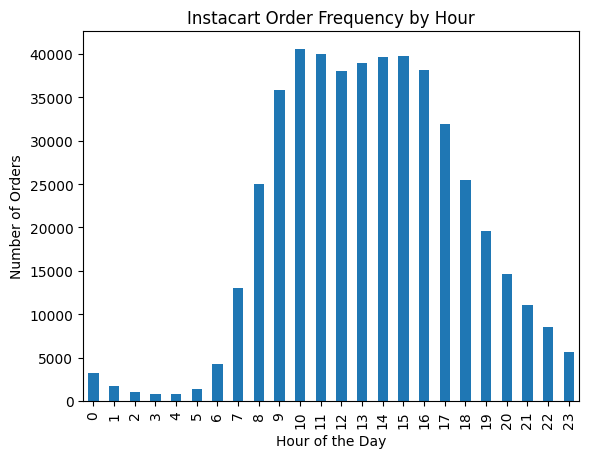

In [40]:


pd.api.types.is_datetime64_any_dtype(df_instacart_orders['order_hour_of_day'])

order_frequency_by_hour = df_instacart_orders['order_hour_of_day'].value_counts().sort_index()


order_frequency_by_hour.plot(kind='bar')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Instacart Order Frequency by Hour')
plt.show()

### [A3] What day of the week do people shop for groceries?

The most common day for grocery shopping is: 0


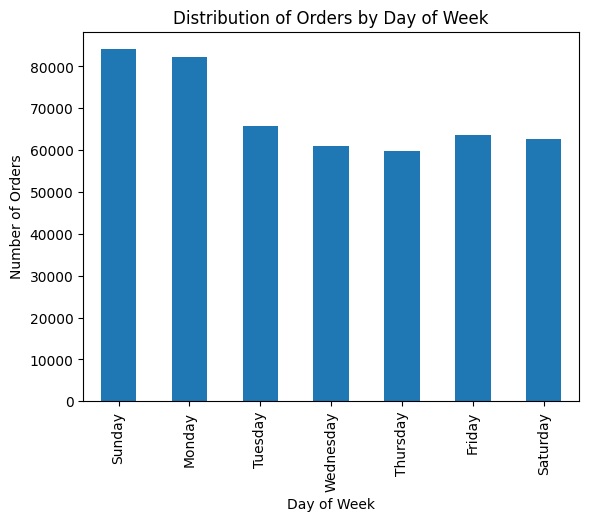

In [41]:
most_common_day = df_instacart_orders['order_dow'].mode()[0]
days = {0: 'Sunday', 1: 'Monday', 2:'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
orders_per_day = df_instacart_orders.groupby('order_dow')['order_id'].count()
orders_per_day.index = orders_per_day.index.map(days)
print(f"The most common day for grocery shopping is: {most_common_day}")


orders_per_day.plot(kind='bar')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders by Day of Week')
plt.show()

### [A4] How long do people wait until placing another order?

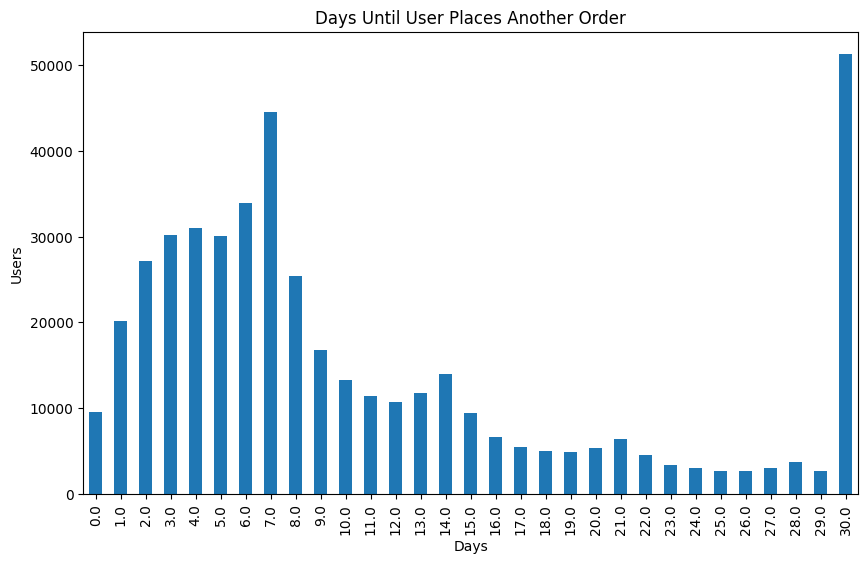

In [42]:

df_instacart_orders.groupby('days_since_prior_order')['user_id'].count().plot(kind='bar', figsize=(10,6), xlabel='Days', ylabel='Users', title='Days Until User Places Another Order')
plt.show()

In [43]:
days = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}#new directory

order_dow
Sunday       84090
Monday       82185
Tuesday      65833
Wednesday    60897
Thursday     59810
Friday       63488
Saturday     62649
Name: order_id, dtype: int64


<AxesSubplot:xlabel='order_dow'>

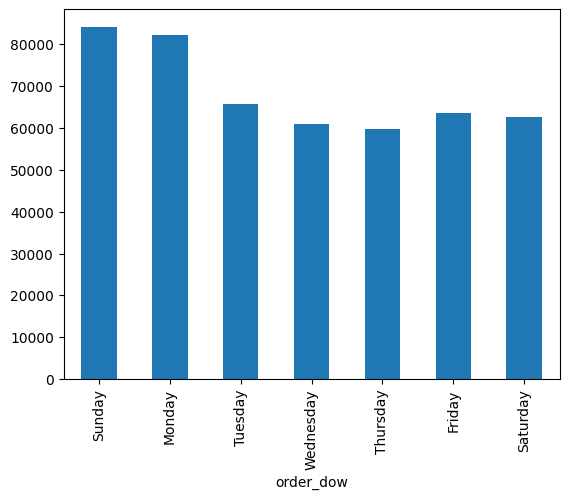

In [44]:
orders_per_day = df_instacart_orders.groupby('order_dow')['order_id'].count()
orders_per_day.index = orders_per_day.index.map(days)
print(orders_per_day)
orders_per_day.plot(kind='bar')

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [45]:
df_instacart_orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [46]:
wednesday_orders = df_instacart_orders[df_instacart_orders['order_dow'] == 3]

saturday_orders = df_instacart_orders[df_instacart_orders['order_dow'] == 6]


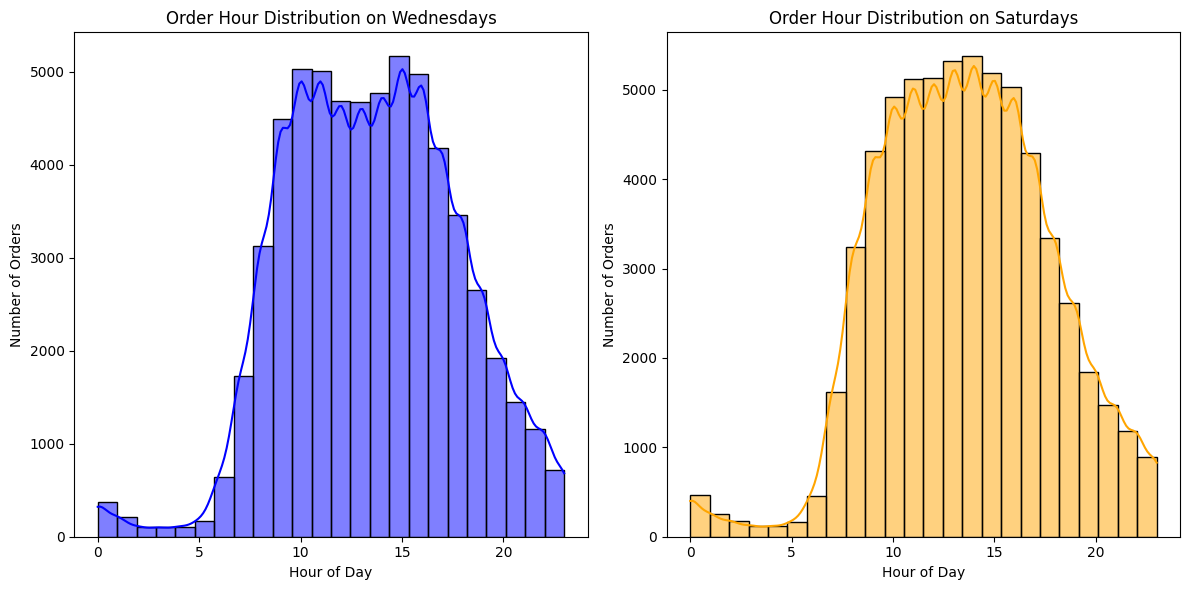

In [47]:
import seaborn as sns

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)

sns.histplot(wednesday_orders['order_hour_of_day'], bins=24, kde=True, color='blue')

plt.title('Order Hour Distribution on Wednesdays')

plt.xlabel('Hour of Day')

plt.ylabel('Number of Orders')

plt.subplot(1, 2, 2)

sns.histplot(saturday_orders['order_hour_of_day'], bins=24, kde=True, color='orange')

plt.title('Order Hour Distribution on Saturdays')

plt.xlabel('Hour of Day')

plt.ylabel('Number of Orders')

plt.tight_layout()

plt.show()



### [B2] What's the distribution for the number of orders per customer?

In [48]:
df_instacart_orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


Difference in the number of orders per customer: 27


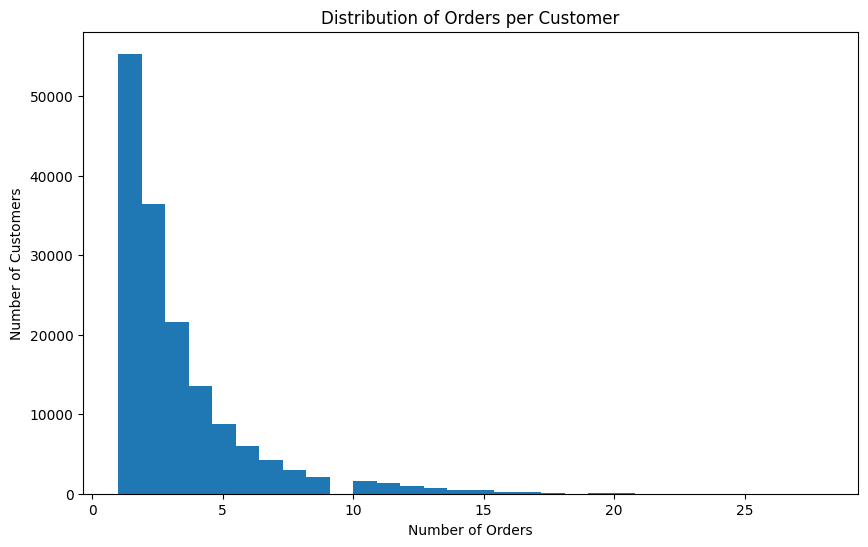

In [49]:
orders_per_customer = df_instacart_orders.groupby('user_id').size()

difference_in_orders = orders_per_customer.max() - orders_per_customer.min()

print("Difference in the number of orders per customer:", difference_in_orders)

plt.figure(figsize=(10, 6))
orders_per_customer.plot(kind='hist', bins=30)
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.title('Distribution of Orders per Customer')
plt.show()

### [B3] What are the top 20 popular products (display their id and name)?

In [50]:
df_instacart_orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [51]:
product_counts = df_instacart_orders['order_number'].value_counts()

top_20_products = product_counts.head(20).index

top_20_products = df_instacart_orders[df_instacart_orders['order_number'].isin(top_20_products)]

top_20_products = top_20_products.merge(product_counts.head(20), left_on='order_number', right_index=True)


merged = pd.merge(df_order_products, df_products, on='product_id')
product_counts = merged.groupby(['product_id', 'product_name']).size()
product_counts.sort_values(ascending=False).head(20)

product_id  product_name            
24852       Banana                      66050
13176       Bag of Organic Bananas      53297
21137       Organic Strawberries        37039
21903       Organic Baby Spinach        33971
47209       Organic Hass Avocado        29773
47766       Organic Avocado             24689
47626       Large Lemon                 21495
16797       Strawberries                20018
26209       Limes                       19690
27845       Organic Whole Milk          19600
27966       Organic Raspberries         19197
22935       Organic Yellow Onion        15898
24964       Organic Garlic              15292
45007       Organic Zucchini            14584
39275       Organic Blueberries         13879
49683       Cucumber Kirby              13675
28204       Organic Fuji Apple          12544
5876        Organic Lemon               12232
8277        Apple Honeycrisp Organic    11993
40706       Organic Grape Tomatoes      11781
dtype: int64

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [52]:
df_instacart_orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [53]:
order_counts = df_order_products.groupby('order_id')['product_id'].count()

average_items_per_order = order_counts.mean()

print(average_items_per_order)

10.098983215049127


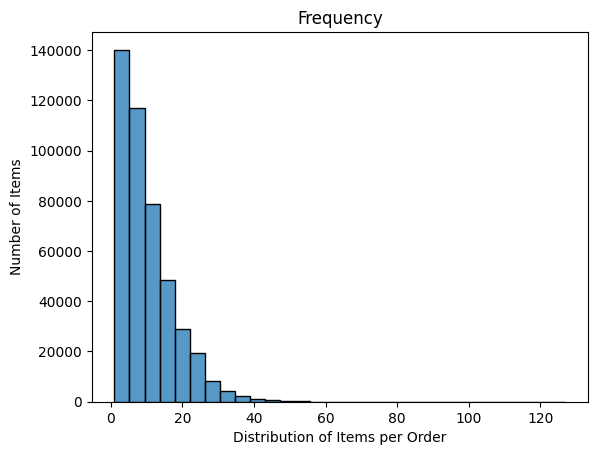

In [54]:
import matplotlib.pyplot as plt

import seaborn as sns

sns.histplot(order_counts, bins=30, kde=False)

plt.xlabel('Distribution of Items per Order')

plt.ylabel('Number of Items')

plt.title('Frequency')

plt.show()

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [55]:
df_order_products

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


In [56]:
reorder_df = df_order_products[df_order_products['reordered'] == 1]
top_20_reorder_id = reorder_df['product_id'].value_counts()[:20].reset_index()
top_20_reorder_id = top_20_reorder_id.rename(columns={'index': 'product_id', 'product_id': 'number_of_reorder'})
top_20_reorder = top_20_reorder_id.merge(df_products[['product_id', 'product_name']], on='product_id', how='left')
top_20_reorder

,product_id,number_of_reorder,product_name
0,24852,55763,Banana
1,13176,44450,Bag of Organic Bananas
2,21137,28639,Organic Strawberries
3,21903,26233,Organic Baby Spinach
4,47209,23629,Organic Hass Avocado
5,47766,18743,Organic Avocado
6,27845,16251,Organic Whole Milk
7,47626,15044,Large Lemon
8,27966,14748,Organic Raspberries
9,16797,13945,Strawberries


In [57]:
reorder_df[reorder_df['product_id'] == 24852]

,order_id,product_id,add_to_cart_order,reordered
100,194806,24852,3.0,1
109,3176371,24852,1.0,1
151,1442232,24852,3.0,1
362,1926105,24852,3.0,1
424,1544211,24852,1.0,1
...,...,...,...,...
4544722,3006846,24852,2.0,1
4544731,2713872,24852,7.0,1
4544823,2774827,24852,2.0,1
4544842,3402221,24852,1.0,1


<Figure size 1000x600 with 0 Axes>

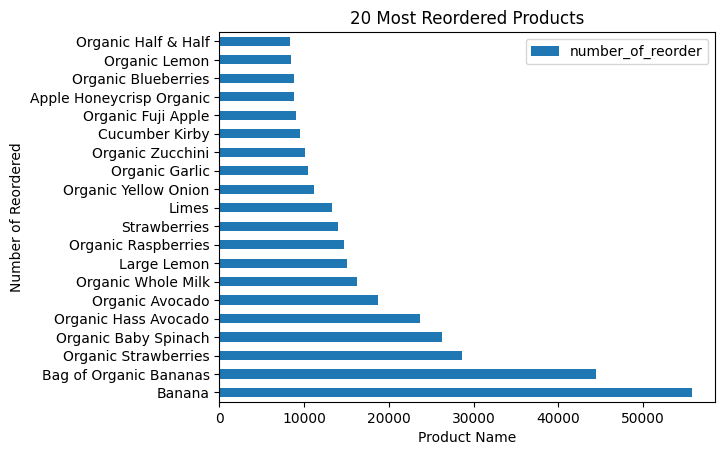

In [58]:
plt.figure(figsize=(10, 6))
top_20_reorder.plot.barh(x='product_name', y='number_of_reorder')
plt.title('20 Most Reordered Products')
plt.xlabel('Product Name')
plt.ylabel('Number of Reordered')
plt.show()